In this example, we'll interact with the Kasthuri CELL (2014) dataset.

In [1]:
%matplotlib inline

In [2]:
import ndio
print ndio.version

1.0.0


## Downloading Image Data

First, we'll list the available channels in the dataset, which has the token `kasthuri11` in the NeuroData datastore.

In [3]:
import ndio.remote.neurodata as neurodata
nd = neurodata()

In [4]:
token = 'kasthuri11'
channels = nd.get_channels(token)
print channels.keys()

[u'image']


In [5]:
query = {
    'token': token,
    'channel': 'image',
    'x_start': 1000,
    'x_stop': 1300,
    'y_start': 2000,
    'y_stop': 2400,
    'z_start': 1100,
    'z_stop': 1150,
    'resolution': 3
}

example_volume = nd.get_cutout(**query)

To visualize this volume, we'll use PIL. (You may not have this installed on your system by default, and you may need to `pip install pillow` to get this functionality.)

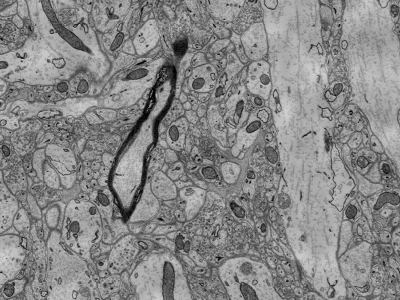

In [13]:
from PIL import Image
img = Image.fromarray(example_volume[:,:,6].astype('uint8'))
img

Here, we have an image slice cutout of the dataset at $2^3$ downsampled resolution (`resolution=3`). If we wanted to download the entire dataset into a numpy array, we'd first need to figure out the image bounds. Luckily, ndio supports this:

In [7]:
x_stop, y_stop, z_stop = nd.get_image_size(token, resolution=3)
print x_stop, y_stop, z_stop

2688 3328 1850


We'll also need the image offset (the point at which it is offset from the $(0, 0, 0)$ origin):

In [8]:
x_start, y_start, z_start = nd.get_image_offset(token, resolution=3)
print x_start, y_start, z_start

0 0 1


From this, we can now download the entire dataset by running the code,

```python
query = {
    'token': token,
    'channel': 'image',
    'x_start': x_start,
    'x_stop': x_stop,
    'y_start': y_start,
    'y_stop': y_stop,
    'z_start': z_start,
    'z_stop': z_stop,
    'resolution': 3
}

huge_3D_array = nd.get_cutout(**query)
```

...but of course, I don't run that code here, since **it may take several days to execute**.

If you find yourself wanting to download the entire dataset all at once, then it's probably wise to consider what code you're running, and if it's possible to run it in parallel on many smaller chunks.

## Annotations and Metadata
Now let's look at some other tokens and channels that correlate with this dataset.

Human-annotation data are available in the `kasthuri2015_ramon_v4` token. Let's see what channels are available to us:

In [9]:
human_annotation_token = 'kasthuri2015_ramon_v4'
nd.get_channels(human_annotation_token).keys()

[u'synapses', u'vesicles', u'mitochondria', u'neurons']

Let's look at the same coordinates as our original image, but now in the `synapses` channel:

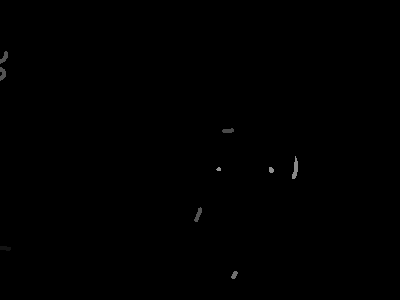

In [10]:
query = {
    'token': human_annotation_token,
    'channel': 'synapses',
    'x_start': 1000,
    'x_stop': 1300,
    'y_start': 2000,
    'y_stop': 2400,
    'z_start': 1100,
    'z_stop': 1150,
    'resolution': 3
}

synapse_volume = nd.get_cutout(**query)
Image.fromarray(synapse_volume[:,:,40].astype('uint8'))